#### ¿Se pueden catalogar las noticias con la descripción y los titulares? Compara tu clasificación con las categorías incluidas en el set de datos.

In [0]:
# to load, access, process and dump json files
import json
# regular repression
import re
# to parse HTML contents
#from bs4 import BeautifulSoup

# for numerical analysis
import numpy as np 
# to store and process in a dataframe
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

# for ploting graphs
import matplotlib.pyplot as plt
# advancec ploting
import seaborn as sns
# to create word clouds
#from wordcloud import WordCloud, STOPWORDS 

# To encode values
from sklearn.preprocessing import LabelEncoder
# Convert a collection of text documents to a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer
# confusion matrix
from sklearn.metrics import confusion_matrix
# train test split
from sklearn.model_selection import train_test_split

# for deep learning 
import tensorflow as tf
# to tokenize text
from tensorflow.keras.preprocessing.text import Tokenizer
# to pad sequence 
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
# import data
df = pd.read_json('/dbfs/mnt/pobreza/changeanalysis/func-mintic-pobrezamultidimensio/Population and Poverty Mapping/W&J/News_Category_Dataset_v2.json', lines=True)
# shape
print('No. of rows and columns :', df.shape)
# show first few rows
df.head(30)

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26
5,ENTERTAINMENT,Morgan Freeman 'Devastated' That Sexual Harass...,Ron Dicker,https://www.huffingtonpost.com/entry/morgan-fr...,"""It is not right to equate horrific incidents ...",2018-05-26
6,ENTERTAINMENT,Donald Trump Is Lovin' New McDonald's Jingle I...,Ron Dicker,https://www.huffingtonpost.com/entry/donald-tr...,"It's catchy, all right.",2018-05-26
7,ENTERTAINMENT,What To Watch On Amazon Prime That’s New This ...,Todd Van Luling,https://www.huffingtonpost.com/entry/amazon-pr...,There's a great mini-series joining this week.,2018-05-26
8,ENTERTAINMENT,Mike Myers Reveals He'd 'Like To' Do A Fourth ...,Andy McDonald,https://www.huffingtonpost.com/entry/mike-myer...,"Myer's kids may be pushing for a new ""Powers"" ...",2018-05-26
9,ENTERTAINMENT,What To Watch On Hulu That’s New This Week,Todd Van Luling,https://www.huffingtonpost.com/entry/hulu-what...,You're getting a recent Academy Award-winning ...,2018-05-26


In [0]:
# Stopwords list from https://github.com/Yoast/YoastSEO.js/blob/develop/src/config/stopwords.js
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

In [0]:
# to plot n-gram
# ==============

def category_ngram(category, n):
    
    temp_df = df[df['category'] == category]
    
    word_vectorizer = CountVectorizer(ngram_range=(n, n), analyzer='word')
    sparse_matrix = word_vectorizer.fit_transform(temp_df['headline'])
    
    frequencies = sum(sparse_matrix).toarray()[0]
    
    return pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])\
            .sort_values(by='frequency', ascending=False) \
            .reset_index() \
            .head(10)

In [0]:
# to plot wordcloud
# =================

def plot_wordcloud(headlines, cmap):
    fig, ax = plt.subplots(figsize=(8, 6))
    wc = WordCloud(max_words = 1000, background_color ='white', stopwords = stopwords, 
                   min_font_size = 10, colormap=cmap)
    wc = wc.generate(headlines)
    plt.axis('off')
    plt.imshow(wc)

In [0]:
# to plot model accuracy and loss
# ===============================

def plot_history(history):
    
    plt.figure(figsize=(20, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', c='dodgerblue', lw='2')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', c='orange', lw='2')
    plt.title('Accuracy', loc='left', fontsize=16)
    plt.xlabel("Epochs")
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss', c='dodgerblue', lw='2')
    plt.plot(history.history['val_loss'], label='Validation Loss', c='orange', lw='2')
    plt.title('Loss', loc='left', fontsize=16)
    plt.xlabel("Epochs")
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

In [0]:
# to plot confusion matrix
# ========================

def plot_cm(pred, ticklabels, figsize):
      
    fig, ax = plt.subplots(1, 1, figsize=(figsize, figsize))

    cm = confusion_matrix(validation_labels, pred)
    sns.heatmap(cm, annot=True, cbar=False, fmt='1d', cmap='Blues', ax=ax)

    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_xticklabels(ticklabels, rotation=90)
    ax.set_yticklabels(ticklabels, rotation=0)

    plt.show()

In [0]:
count_df = pd.DataFrame(df['category'].value_counts()).reset_index()

In [0]:
count_df.head()

,index,category
0,POLITICS,32739
1,WELLNESS,17827
2,ENTERTAINMENT,16058
3,TRAVEL,9887
4,STYLE & BEAUTY,9649


In [0]:
count_df = pd.DataFrame(df['category'].value_counts()).reset_index()
print('There are', len(count_df), 'news categories')

sns.set_style('darkgrid')
plt.figure(figsize=(10, 12))
sns.barplot(data=count_df, y='index', x='category', palette='Dark2')
plt.title('Número de nuevas noticias en cada categoría', loc='left', fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.show()

There are 41 news categories

--------------------------------------------------------------------------- 
 NameError Traceback (most recent call last)
 <command-3460730884418672> in <module> 
 2 print ( 'There are' , len ( count_df ) , 'news categories' ) 
 3 
 ----> 4 sns . set_style ( 'darkgrid' ) 
 5 plt . figure ( figsize = ( 10 , 12 ) ) 
 6 sns . barplot ( data = count_df , y = 'index' , x = 'category' , palette = 'Dark2' ) 

 NameError : name 'sns' is not defined

In [0]:
##Este código lo utilizo para balancear las categorías del modelo, la idea es que todas las categorías queden con la misma frecuencia, esto evita problemas con sobre ajuste o problema de prendizaje perfecto con las categorías que tienen las frecuancias mas altas. todas la categorías quedan de 1004. 
# container for dfs
dfs = []

# loop through each category and get 1004 rows and append to dfs
for category in df['category'].unique():
    temp = df[df['category']==category]
    dfs.append(temp.sample(1004))
    
# concatenate dataframes
df = pd.concat(dfs)

# shuffle dataframe
df = df.sample(frac=1).reset_index(drop=True)

# first few rows
df.head()

# size of df
#df.shape
#(41164, 6)  = 41*1004

,category,headline,authors,link,short_description,date
0,WEIRD NEWS,Mothaf**kin' Mouse On A Mothaf**kin' Plane Del...,Steven Hoffer,https://www.huffingtonpost.com/entry/mouse-pla...,Snakes on this plane might actually have addre...,2017-03-02
1,TRAVEL,"Savor the Unexpected Pleasures of La Paz, Mexico","Joshua Estrin, Contributor\nA man with an opinion",https://www.huffingtonpost.com/entry/savor-the...,"Take the opportunity to swim with sea lions, w...",2013-12-31
2,MEDIA,Former BBC Journalist Mysteriously Found Dead ...,,https://www.huffingtonpost.com/entry/former-bb...,Turkey's state-run Anadolu Agency said Jacquel...,2015-10-19
3,DIVORCE,Why Going Back to Work After Divorce Could be ...,"Jackie Pilossoph, Contributor\nCreator, Divorc...",https://www.huffingtonpost.com/entry/back-to-w...,"In closing, I will say this. Nothing bad can e...",2014-03-31
4,COMEDY,Yoda Yoga: Stretching Star Wars Style (VIDEO),Irina Dvalidze,https://www.huffingtonpost.com/entry/yoda-yoga...,Who needs a Downward Facing Dog when you can d...,2013-06-30


In [0]:
count_df = pd.DataFrame(df['category'].value_counts()).reset_index()
count_df.head()
print('There are', len(count_df), 'news categories')

There are 41 news categories

In [0]:
# removing non alphanumeric character
def alpha_num(text):
    return re.sub(r'[^A-Za-z0-9 ]', '', text)

# removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stopwords:
            final_text.append(i.strip())
    return " ".join(final_text)

In [0]:
# apply preprocessing steps
# connect 'headline' and 'short_description'
df['text'] = df['headline'] + " " + df['short_description']
df['headline'] = df['text'].str.lower()
df['headline'] = df['headline'].apply(alpha_num)
df['headline'] = df['headline'].apply(remove_stopwords)


df.head()

,category,headline,authors,link,short_description,date,text
0,WEIRD NEWS,mothafkin mouse mothafkin plane delays flight ...,Steven Hoffer,https://www.huffingtonpost.com/entry/mouse-pla...,Snakes on this plane might actually have addre...,2017-03-02,Mothaf**kin' Mouse On A Mothaf**kin' Plane Del...
1,TRAVEL,savor unexpected pleasures la paz mexico take ...,"Joshua Estrin, Contributor\nA man with an opinion",https://www.huffingtonpost.com/entry/savor-the...,"Take the opportunity to swim with sea lions, w...",2013-12-31,"Savor the Unexpected Pleasures of La Paz, Mexi..."
2,MEDIA,former bbc journalist mysteriously found dead ...,,https://www.huffingtonpost.com/entry/former-bb...,Turkey's state-run Anadolu Agency said Jacquel...,2015-10-19,Former BBC Journalist Mysteriously Found Dead ...
3,DIVORCE,going back work divorce best thing closing wil...,"Jackie Pilossoph, Contributor\nCreator, Divorc...",https://www.huffingtonpost.com/entry/back-to-w...,"In closing, I will say this. Nothing bad can e...",2014-03-31,Why Going Back to Work After Divorce Could be ...
4,COMEDY,yoda yoga stretching star wars style video nee...,Irina Dvalidze,https://www.huffingtonpost.com/entry/yoda-yoga...,Who needs a Downward Facing Dog when you can d...,2013-06-30,Yoda Yoga: Stretching Star Wars Style (VIDEO) ...


In [0]:
# unique news category
df['category'].unique()

Out[130]: array(['ENVIRONMENT', 'FIFTY', 'HOME & LIVING', 'ARTS & CULTURE',
 'FOOD & DRINK', 'COMEDY', 'TECH', 'ENTERTAINMENT', 'SPORTS',
 'STYLE', 'WORLD NEWS', 'GOOD NEWS', 'POLITICS', 'THE WORLDPOST',
 'GREEN', 'RELIGION', 'WEDDINGS', 'IMPACT', 'BUSINESS', 'SCIENCE',
 'QUEER VOICES', 'CULTURE & ARTS', 'TASTE', 'WOMEN', 'WORLDPOST',
 'PARENTING', 'HEALTHY LIVING', 'STYLE & BEAUTY', 'WEIRD NEWS',
 'ARTS', 'DIVORCE', 'COLLEGE', 'EDUCATION', 'WELLNESS', 'TRAVEL',
 'BLACK VOICES', 'CRIME', 'MONEY', 'MEDIA', 'LATINO VOICES',
 'PARENTS'], dtype=object)

In [0]:
# most frequent unigrams of news belongs 'SCIENCE' category
category_ngram('SCIENCE', 1)

,index,frequency
0,new,140
1,scientists,127
2,may,122
3,space,114
4,science,107
5,study,104
6,video,96
7,will,75
8,can,73
9,not,70


In [0]:
# most frequent bigrams of news belongs 'BUSINESS' category
category_ngram('BUSINESS', 2)

,index,frequency
0,247 wall,40
1,wall st,39
2,women business,31
3,business qa,22
4,wall street,17
5,minimum wage,16
6,new york,15
7,social media,12
8,united states,10
9,not just,9


In [0]:
# most frequent trigrams of news belongs 'POLITICS' category
category_ngram('POLITICS', 3)

,index,frequency
0,rise morning newsbrief,8
1,huffpost rise morning,8
2,morning newsbrief short,7
3,news help start,7
4,help start day,7
5,wrapup news help,7
6,short wrapup news,7
7,newsbrief short wrapup,7
8,welcome huffpost rise,7
9,health care bill,6


In [0]:
#Get text and labels
# container for sentences
news = np.array([headline for headline in df['headline']])

# container for labels
labels = np.array([label for label in df['category']])

In [0]:
print(labels);len(labels)
print(news);len(news)


['WEIRD NEWS' 'DIVORCE' 'EDUCATION' ... 'WORLD NEWS' 'STYLE & BEAUTY'
 'ARTS & CULTURE']
['nfl team drunkest fans football booze go hand hand especially buffalo new york new study reveals buffalo bills may'
 'divorce among samesex couples media increasingly focused legal circumstances samesex marriage overlooking even complex situation samesex divorce'
 'swearing oath part 1 since taking oath many governors begun close public schools violating oath public manner shown perjuring means nothing fact first act office act perjury'
 ...
 'north korea send top official south korea olympics unprecedented trip north koreas ceremonial leader suggests possibility highlevel talks'
 'wear black jeans 5 days 5 different ways photos black jeans staple every girls closet ever since emmanuelle alt stylish glory took reins french'
 'author 100 series centurieslong history dystopias kass morgan writes teens space colony apocalyptic plot part long rich tradition']
Out[24]: 41164

In [0]:
# Label encoding news category
## Recodificar las categorías
enc = LabelEncoder()
labels = enc.fit_transform(labels)
print(enc.classes_)

['ARTS' 'ARTS & CULTURE' 'BLACK VOICES' 'BUSINESS' 'COLLEGE' 'COMEDY'
 'CRIME' 'CULTURE & ARTS' 'DIVORCE' 'EDUCATION' 'ENTERTAINMENT'
 'ENVIRONMENT' 'FIFTY' 'FOOD & DRINK' 'GOOD NEWS' 'GREEN' 'HEALTHY LIVING'
 'HOME & LIVING' 'IMPACT' 'LATINO VOICES' 'MEDIA' 'MONEY' 'PARENTING'
 'PARENTS' 'POLITICS' 'QUEER VOICES' 'RELIGION' 'SCIENCE' 'SPORTS' 'STYLE'
 'STYLE & BEAUTY' 'TASTE' 'TECH' 'THE WORLDPOST' 'TRAVEL' 'WEDDINGS'
 'WEIRD NEWS' 'WELLNESS' 'WOMEN' 'WORLD NEWS' 'WORLDPOST']

In [0]:
# parameters

vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion = .8

In [0]:
# train-test split
train_sentences, validation_sentences, train_labels, validation_labels = train_test_split(news, labels, 
                                                                                          test_size=0.33, 
                                                                                          stratify=labels)

In [0]:
# tokenize sentences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

# convert train dataset to sequence and pad sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

# convert validation dataset to sequence and pad sequences
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)

In [0]:
 validation_padded[:4]


Out[32]: array([[ 1, 502, 1, 1, 1, 923, 1, 1, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0],
 [886, 13, 415, 1, 368, 1, 667, 1, 1, 886, 13, 1, 536,
 1, 1, 1, 1, 423, 226, 352, 182, 22, 165, 14, 1, 1,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0],
 [ 40, 866, 990, 46, 189, 176, 69, 108, 672, 7, 132, 1, 866,
 990, 301, 20, 272, 375, 7, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0],
 [421, 95, 369, 164, 1, 1, 1, 1, 1, 18, 1, 242, 395,
 215, 1, 79, 1, 18, 4, 14, 1, 1, 261, 1, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0]], dtype=int32)

In [0]:
# model initialization
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(41, activation='softmax')
])

# compile model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model summary
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type) Output Shape Param # 
=================================================================
embedding_2 (Embedding) (None, 120, 16) 16000 
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16) 0 
_________________________________________________________________
dense_6 (Dense) (None, 24) 408 
_________________________________________________________________
dense_7 (Dense) (None, 41) 1025 
=================================================================
Total params: 17,433
Trainable params: 17,433
Non-trainable params: 0
_________________________________________________________________
None

In [0]:
# fit model
num_epochs = 100
history = model.fit(train_padded, train_labels, 
                    epochs=num_epochs, verbose=2, 
                    validation_split=0.33)

# predict values
pred = model.predict(validation_padded)
pred = np.array([np.argmax(i) for i in pred])

Epoch 1/100
578/578 - 1s - loss: 3.7127 - accuracy: 0.0259 - val_loss: 3.7098 - val_accuracy: 0.0250
Epoch 2/100
578/578 - 1s - loss: 3.6822 - accuracy: 0.0358 - val_loss: 3.6449 - val_accuracy: 0.0449
Epoch 3/100
578/578 - 1s - loss: 3.6045 - accuracy: 0.0573 - val_loss: 3.5871 - val_accuracy: 0.0625
Epoch 4/100
578/578 - 1s - loss: 3.5176 - accuracy: 0.0822 - val_loss: 3.4873 - val_accuracy: 0.0820
Epoch 5/100
578/578 - 1s - loss: 3.4109 - accuracy: 0.0923 - val_loss: 3.3999 - val_accuracy: 0.0909
Epoch 6/100
578/578 - 1s - loss: 3.3350 - accuracy: 0.1012 - val_loss: 3.3477 - val_accuracy: 0.1024
Epoch 7/100
578/578 - 1s - loss: 3.2853 - accuracy: 0.1093 - val_loss: 3.3233 - val_accuracy: 0.0980
Epoch 8/100
578/578 - 1s - loss: 3.2488 - accuracy: 0.1161 - val_loss: 3.2910 - val_accuracy: 0.1094
Epoch 9/100
578/578 - 1s - loss: 3.2194 - accuracy: 0.1211 - val_loss: 3.2722 - val_accuracy: 0.1150
Epoch 10/100
578/578 - 1s - loss: 3.1952 - accuracy: 0.1269 - val_loss: 3.2578 - val_accuracy: 0.1172
Epoch 11/100
578/578 - 1s - loss: 3.1717 - accuracy: 0.1338 - val_loss: 3.2383 - val_accuracy: 0.1215
Epoch 12/100
578/578 - 1s - loss: 3.1507 - accuracy: 0.1363 - val_loss: 3.2239 - val_accuracy: 0.1323
Epoch 13/100
578/578 - 1s - loss: 3.1283 - accuracy: 0.1459 - val_loss: 3.2109 - val_accuracy: 0.1351
Epoch 14/100
578/578 - 1s - loss: 3.1043 - accuracy: 0.1524 - val_loss: 3.1838 - val_accuracy: 0.1419
Epoch 15/100
578/578 - 1s - loss: 3.0771 - accuracy: 0.1606 - val_loss: 3.1626 - val_accuracy: 0.1514
Epoch 16/100
578/578 - 1s - loss: 3.0469 - accuracy: 0.1708 - val_loss: 3.1411 - val_accuracy: 0.1555
Epoch 17/100
578/578 - 1s - loss: 3.0187 - accuracy: 0.1776 - val_loss: 3.1172 - val_accuracy: 0.1622
Epoch 18/100
578/578 - 1s - loss: 2.9871 - accuracy: 0.1851 - val_loss: 3.0933 - val_accuracy: 0.1662
Epoch 19/100
578/578 - 1s - loss: 2.9555 - accuracy: 0.1947 - val_loss: 3.0744 - val_accuracy: 0.1736
Epoch 20/100
578/578 - 1s - loss: 2.9265 - accuracy: 0.2021 - val_loss: 3.0612 - val_accuracy: 0.1792
Epoch 21/100
578/578 - 1s - loss: 2.8992 - accuracy: 0.2072 - val_loss: 3.0312 - val_accuracy: 0.1867
Epoch 22/100
578/578 - 1s - loss: 2.8734 - accuracy: 0.2151 - val_loss: 3.0197 - val_accuracy: 0.1898
Epoch 23/100
578/578 - 1s - loss: 2.8486 - accuracy: 0.2243 - val_loss: 2.9931 - val_accuracy: 0.1967
Epoch 24/100
578/578 - 1s - loss: 2.8241 - accuracy: 0.2313 - val_loss: 2.9781 - val_accuracy: 0.2015
Epoch 25/100
578/578 - 1s - loss: 2.8030 - accuracy: 0.2373 - val_loss: 2.9609 - val_accuracy: 0.2051
Epoch 26/100
578/578 - 1s - loss: 2.7809 - accuracy: 0.2419 - val_loss: 2.9448 - val_accuracy: 0.2120
Epoch 27/100
578/578 - 1s - loss: 2.7607 - accuracy: 0.2460 - val_loss: 2.9374 - val_accuracy: 0.2176
Epoch 28/100
578/578 - 1s - loss: 2.7424 - accuracy: 0.2530 - val_loss: 2.9219 - val_accuracy: 0.2175
Epoch 29/100
578/578 - 1s - loss: 2.7227 - accuracy: 0.2583 - val_loss: 2.9120 - val_accuracy: 0.2236
Epoch 30/100
578/578 - 1s - loss: 2.7060 - accuracy: 0.2631 - val_loss: 2.9001 - val_accuracy: 0.2232
Epoch 31/100
578/578 - 1s - loss: 2.6886 - accuracy: 0.2669 - val_loss: 2.8908 - val_accuracy: 0.2280
Epoch 32/100
578/578 - 1s - loss: 2.6743 - accuracy: 0.2697 - val_loss: 2.8776 - val_accuracy: 0.2297
Epoch 33/100
578/578 - 1s - loss: 2.6567 - accuracy: 0.2724 - val_loss: 2.8721 - val_accuracy: 0.2334
Epoch 34/100
578/578 - 1s - loss: 2.6418 - accuracy: 0.2781 - val_loss: 2.8666 - val_accuracy: 0.2353
Epoch 35/100
578/578 - 1s - loss: 2.6289 - accuracy: 0.2809 - val_loss: 2.8578 - val_accuracy: 0.2381
Epoch 36/100
578/578 - 1s - loss: 2.6136 - accuracy: 0.2863 - val_loss: 2.8546 - val_accuracy: 0.2429
Epoch 37/100
578/578 - 1s - loss: 2.6012 - accuracy: 0.2899 - val_loss: 2.8503 - val_accuracy: 0.2428
Epoch 38/100
578/578 - 1s - loss: 2.5903 - accuracy: 0.2935 - val_loss: 2.8509 - val_accuracy: 0.2424
Epoch 39/100
578/578 - 1s - loss: 2.5776 - accuracy: 0.2938 - val_loss: 2.8284 - val_accuracy: 0.2516
Epoch 40/100
578/578 - 1s - los

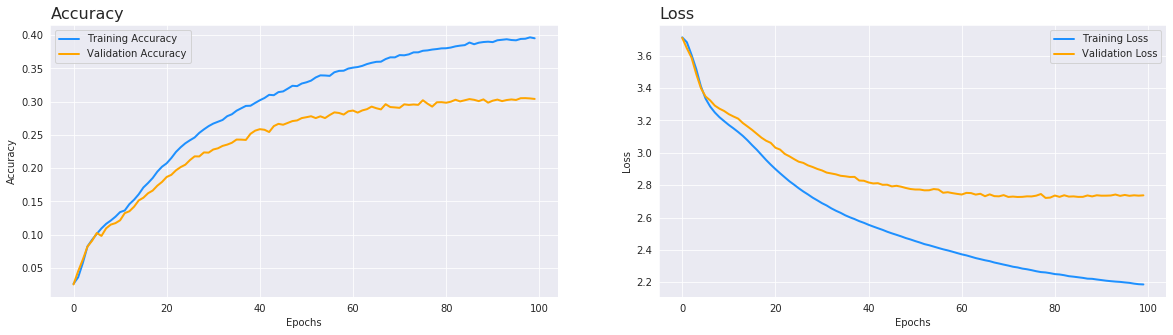

In [0]:
# plot history
plot_history(history)

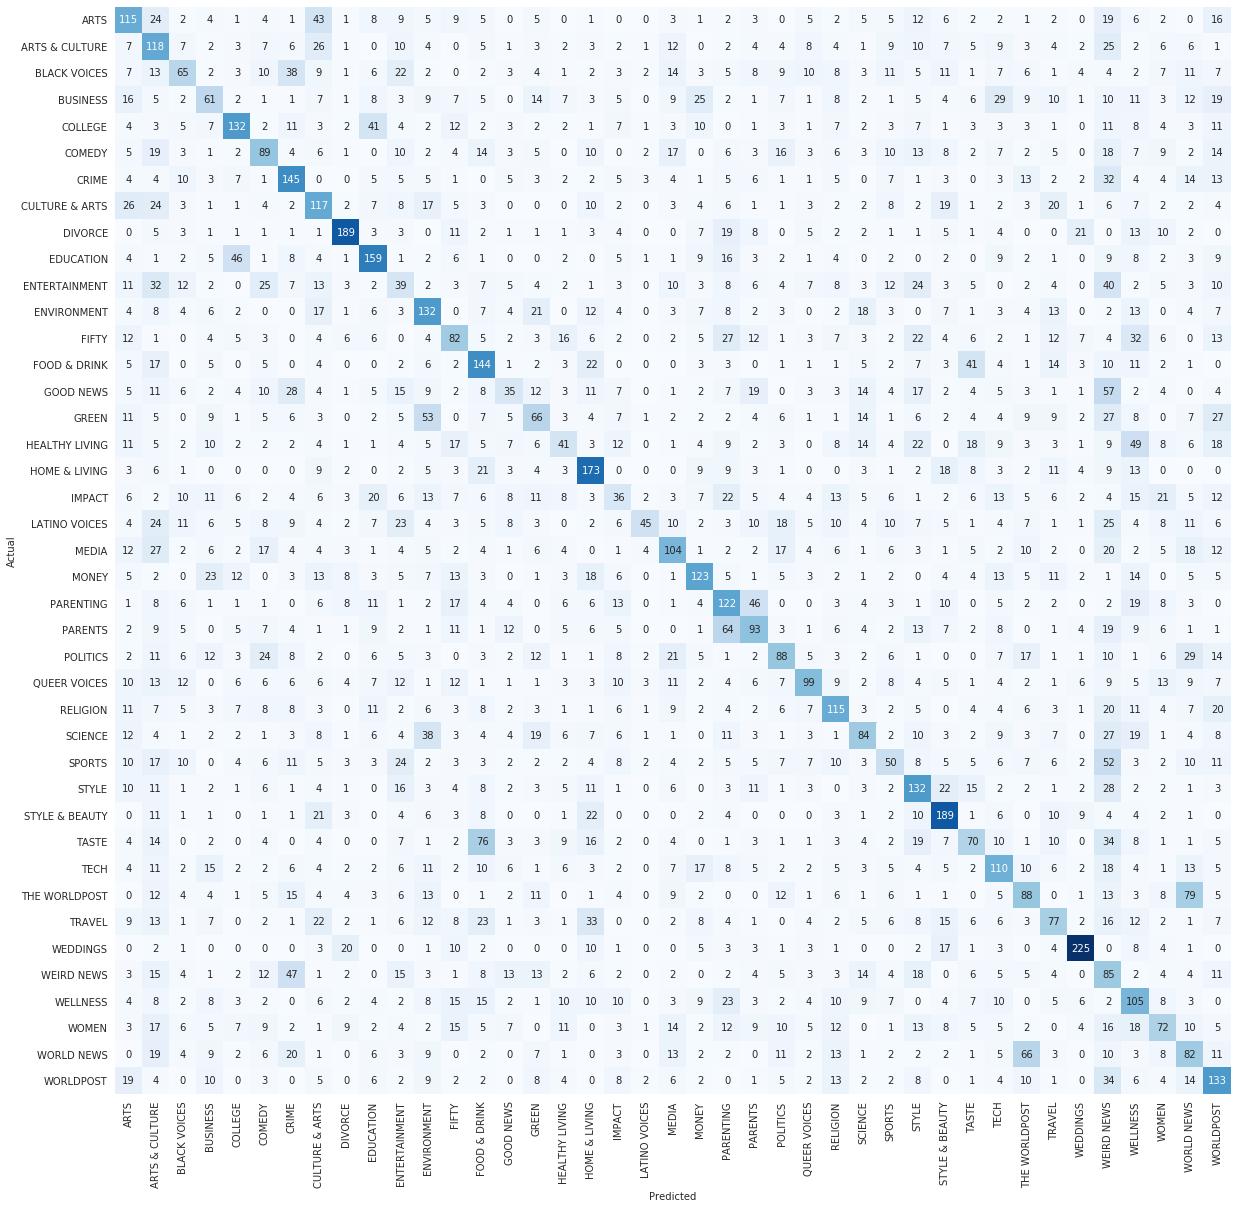

In [0]:
# plot confusion matrix
plot_cm(pred, enc.classes_, 20)

In [0]:
# reviews on which we need to predict
sentence = ["New York City’s public school system, the largest in the U.S., ended in-person classes just eight weeks after they began. Today’s episode of The Daily explores what lessons the city’s struggles hold for the rest of the country.", 
            "At least two people opened fire at a house party in Brooklyn on Sunday night, killing one woman and wounding six others, the police said. The motive remains unclear"]

# convert to a sequence
sequences = tokenizer.texts_to_sequences(sentence)

# pad the sequence
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# preict the label
pred = model.predict(padded)
pred = np.array([np.argmax(i) for i in pred])
for i in range(len(sentence)):
     print(sentence[i], '\t:\t', enc.classes_[pred[i]])

New York City’s public school system, the largest in the U.S., ended in-person classes just eight weeks after they began. Today’s episode of The Daily explores what lessons the city’s struggles hold for the rest of the country. : EDUCATION
At least two people opened fire at a house party in Brooklyn on Sunday night, killing one woman and wounding six others, the police said. The motive remains unclear : GREEN

In [0]:

# model initialization
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(41, activation='softmax')
])

# compile model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model summary
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type) Output Shape Param # 
=================================================================
embedding_3 (Embedding) (None, 120, 16) 16000 
_________________________________________________________________
bidirectional (Bidirectional (None, 64) 12544 
_________________________________________________________________
dense_8 (Dense) (None, 24) 1560 
_________________________________________________________________
dense_9 (Dense) (None, 41) 1025 
=================================================================
Total params: 31,129
Trainable params: 31,129
Non-trainable params: 0
_________________________________________________________________
None

In [0]:
# fit model
num_epochs = 50
history = model.fit(train_padded, train_labels, 
                    epochs=num_epochs, verbose=2, 
                    validation_split=0.33)

# predict values
pred = model.predict(validation_padded)
pred = np.array([np.argmax(i) for i in pred])

Epoch 1/50
578/578 - 31s - loss: 3.6017 - accuracy: 0.0522 - val_loss: 3.3986 - val_accuracy: 0.0906
Epoch 2/50
578/578 - 28s - loss: 3.2369 - accuracy: 0.1170 - val_loss: 3.1774 - val_accuracy: 0.1319
Epoch 3/50
578/578 - 28s - loss: 3.0633 - accuracy: 0.1525 - val_loss: 3.0750 - val_accuracy: 0.1629
Epoch 4/50
578/578 - 28s - loss: 2.9356 - accuracy: 0.1895 - val_loss: 2.9985 - val_accuracy: 0.1797
Epoch 5/50
578/578 - 28s - loss: 2.8385 - accuracy: 0.2118 - val_loss: 2.9430 - val_accuracy: 0.1984
Epoch 6/50
578/578 - 27s - loss: 2.7613 - accuracy: 0.2381 - val_loss: 2.9100 - val_accuracy: 0.2079
Epoch 7/50
578/578 - 27s - loss: 2.6938 - accuracy: 0.2599 - val_loss: 2.8665 - val_accuracy: 0.2282
Epoch 8/50
578/578 - 27s - loss: 2.6206 - accuracy: 0.2830 - val_loss: 2.8111 - val_accuracy: 0.2458
Epoch 9/50
578/578 - 27s - loss: 2.5520 - accuracy: 0.3034 - val_loss: 2.8061 - val_accuracy: 0.2520
Epoch 10/50
578/578 - 27s - loss: 2.4924 - accuracy: 0.3172 - val_loss: 2.7647 - val_accuracy: 0.2607
Epoch 11/50
578/578 - 27s - loss: 2.4448 - accuracy: 0.3266 - val_loss: 2.7476 - val_accuracy: 0.2724
Epoch 12/50
578/578 - 27s - loss: 2.4069 - accuracy: 0.3418 - val_loss: 2.7391 - val_accuracy: 0.2707
Epoch 13/50
578/578 - 27s - loss: 2.3739 - accuracy: 0.3496 - val_loss: 2.7427 - val_accuracy: 0.2755
Epoch 14/50
578/578 - 27s - loss: 2.3405 - accuracy: 0.3565 - val_loss: 2.7187 - val_accuracy: 0.2826
Epoch 15/50
578/578 - 27s - loss: 2.3127 - accuracy: 0.3632 - val_loss: 2.7419 - val_accuracy: 0.2825
Epoch 16/50
578/578 - 27s - loss: 2.2837 - accuracy: 0.3710 - val_loss: 2.7179 - val_accuracy: 0.2857
Epoch 17/50
578/578 - 27s - loss: 2.2567 - accuracy: 0.3802 - val_loss: 2.7443 - val_accuracy: 0.2861
Epoch 18/50
578/578 - 27s - loss: 2.2303 - accuracy: 0.3836 - val_loss: 2.7321 - val_accuracy: 0.2847
Epoch 19/50
578/578 - 27s - loss: 2.2049 - accuracy: 0.3928 - val_loss: 2.7305 - val_accuracy: 0.2927
Epoch 20/50
578/578 - 27s - loss: 2.1790 - accuracy: 0.3974 - val_loss: 2.7267 - val_accuracy: 0.2908
Epoch 21/50
578/578 - 27s - loss: 2.1525 - accuracy: 0.4063 - val_loss: 2.7726 - val_accuracy: 0.2868
Epoch 22/50
578/578 - 27s - loss: 2.1284 - accuracy: 0.4120 - val_loss: 2.7741 - val_accuracy: 0.2920
Epoch 23/50
578/578 - 27s - loss: 2.1052 - accuracy: 0.4172 - val_loss: 2.8122 - val_accuracy: 0.2872
Epoch 24/50
578/578 - 27s - loss: 2.0793 - accuracy: 0.4245 - val_loss: 2.8015 - val_accuracy: 0.2906
Epoch 25/50
578/578 - 27s - loss: 2.0601 - accuracy: 0.4274 - val_loss: 2.8277 - val_accuracy: 0.2891
Epoch 26/50
578/578 - 27s - loss: 2.0325 - accuracy: 0.4345 - val_loss: 2.8217 - val_accuracy: 0.2891
Epoch 27/50
578/578 - 27s - loss: 2.0156 - accuracy: 0.4390 - val_loss: 2.8464 - val_accuracy: 0.2869
Epoch 28/50
578/578 - 27s - loss: 1.9936 - accuracy: 0.4444 - val_loss: 2.8632 - val_accuracy: 0.2893
Epoch 29/50
578/578 - 27s - loss: 1.9709 - accuracy: 0.4508 - val_loss: 2.8956 - val_accuracy: 0.2881
Epoch 30/50
578/578 - 27s - loss: 1.9538 - accuracy: 0.4551 - val_loss: 2.9191 - val_accuracy: 0.2872
Epoch 31/50
578/578 - 29s - loss: 1.9379 - accuracy: 0.4584 - val_loss: 2.9261 - val_accuracy: 0.2839
Epoch 32/50
578/578 - 30s - loss: 1.9158 - accuracy: 0.4659 - val_loss: 2.9457 - val_accuracy: 0.2862
Epoch 33/50
578/578 - 29s - loss: 1.8980 - accuracy: 0.4700 - val_loss: 2.9954 - val_accuracy: 0.2826
Epoch 34/50
578/578 - 29s - loss: 1.8747 - accuracy: 0.4743 - val_loss: 3.0217 - val_accuracy: 0.2763
Epoch 35/50
578/578 - 29s - loss: 1.8572 - accuracy: 0.4772 - val_loss: 3.0176 - val_accuracy: 0.2807
Epoch 36/50
578/578 - 29s - loss: 1.8402 - accuracy: 0.4830 - val_loss: 3.0853 - val_accuracy: 0.2821
Epoch 37/50
578/578 - 29s - loss: 1.8220 - accuracy: 0.4882 - val_loss: 3.0680 - val_accuracy: 0.2775
Epoch 38/50
578/578 - 30s - loss: 1.8027 - accuracy: 0.4906 - val_loss: 3.1339 - val_accuracy: 0.2762
Epoch 39/50
578/578 - 29s - loss: 1.7869 - accuracy: 0.4983 - val_loss: 3.1434 - val_accuracy: 0.2757
Epoch 40/50
578/578 - 30s - los

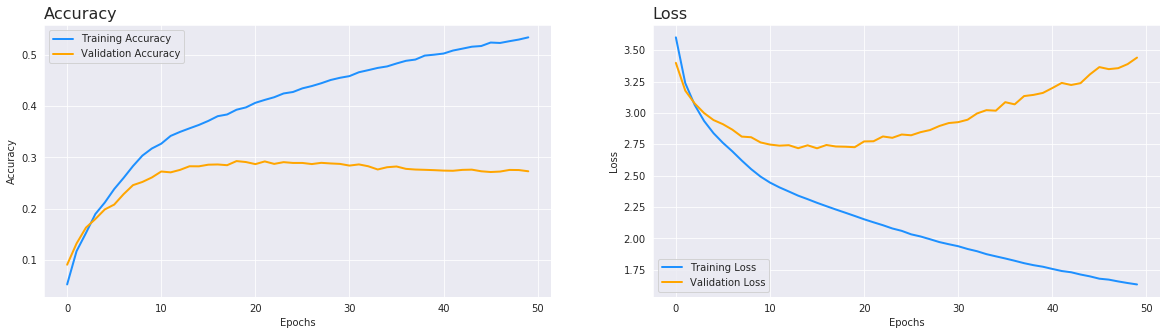

In [0]:
# plot history
plot_history(history)

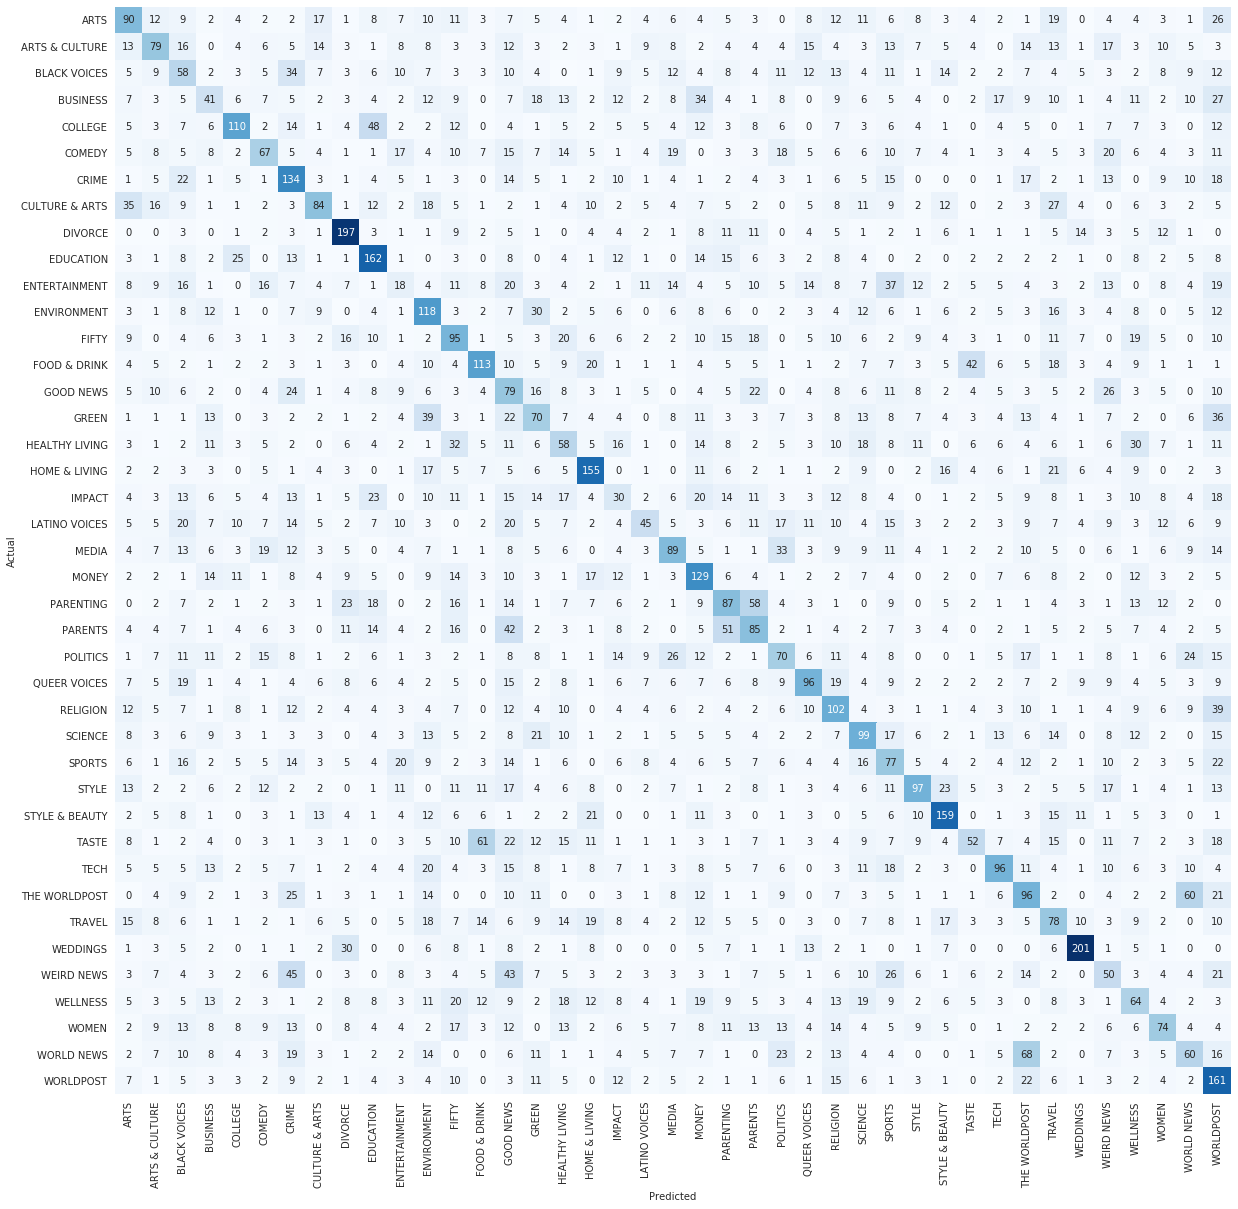

In [0]:
# plot confusion matrix
plot_cm(pred, enc.classes_, 20)

In [0]:
# Infering on validation data we get probability distribution on given data.
y_valid_pred = model.predict(validation_padded)

In [0]:
pred = model.predict(padded)
pred = np.array([np.argmax(i) for i in pred])
pred


Out[67]: array([ 9, 15])

In [0]:
# reviews on which we need to predict
# reviews on which we need to predict
sentence = ["New York City’s public school system, the largest in the U.S., ended in-person classes just eight weeks after they began. Today’s episode of The Daily explores what lessons the city’s struggles hold for the rest of the country.", 
            "At least two people opened fire at a house party in Brooklyn on Sunday night, killing one woman and wounding six others, the police said. The motive remains unclear"]


# convert to a sequence
sequences = tokenizer.texts_to_sequences(sentence)

# pad the sequence
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# preict the label
pred = model.predict(padded)
pred = np.array([np.argmax(i) for i in pred])
for i in range(len(sentence)):

    print(sentence[i], '\t:\t', enc.classes_[pred[i]])

New York City’s public school system, the largest in the U.S., ended in-person classes just eight weeks after they began. Today’s episode of The Daily explores what lessons the city’s struggles hold for the rest of the country. : EDUCATION
At least two people opened fire at a house party in Brooklyn on Sunday night, killing one woman and wounding six others, the police said. The motive remains unclear : GREEN

In [0]:
# model initialization
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(41, activation='softmax')
])

# compile model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model summary
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type) Output Shape Param # 
=================================================================
embedding_4 (Embedding) (None, 120, 16) 16000 
_________________________________________________________________
conv1d (Conv1D) (None, 116, 128) 10368 
_________________________________________________________________
global_max_pooling1d (Global (None, 128) 0 
_________________________________________________________________
dense_10 (Dense) (None, 24) 3096 
_________________________________________________________________
dense_11 (Dense) (None, 41) 1025 
=================================================================
Total params: 30,489
Trainable params: 30,489
Non-trainable params: 0
_________________________________________________________________
None

In [0]:
# fit model
num_epochs = 50
history = model.fit(train_padded, train_labels, 
                    epochs=num_epochs, verbose=2, 
                    validation_split=0.33)

# predict values
pred = model.predict(validation_padded)
pred = np.array([np.argmax(i) for i in pred])

Epoch 1/50
578/578 - 2s - loss: 1.0419 - accuracy: 0.6909 - val_loss: 5.1653 - val_accuracy: 0.2239
Epoch 2/50
578/578 - 2s - loss: 1.0248 - accuracy: 0.6971 - val_loss: 5.2516 - val_accuracy: 0.2238
Epoch 3/50
578/578 - 2s - loss: 1.0111 - accuracy: 0.6995 - val_loss: 5.3428 - val_accuracy: 0.2250
Epoch 4/50
578/578 - 2s - loss: 0.9984 - accuracy: 0.7040 - val_loss: 5.4066 - val_accuracy: 0.2214
Epoch 5/50
578/578 - 2s - loss: 0.9816 - accuracy: 0.7139 - val_loss: 5.5107 - val_accuracy: 0.2242
Epoch 6/50
578/578 - 2s - loss: 0.9716 - accuracy: 0.7126 - val_loss: 5.5635 - val_accuracy: 0.2227
Epoch 7/50
578/578 - 2s - loss: 0.9580 - accuracy: 0.7189 - val_loss: 5.7154 - val_accuracy: 0.2150
Epoch 8/50
578/578 - 2s - loss: 0.9478 - accuracy: 0.7180 - val_loss: 5.7439 - val_accuracy: 0.2178
Epoch 9/50
578/578 - 2s - loss: 0.9357 - accuracy: 0.7202 - val_loss: 5.8356 - val_accuracy: 0.2187
Epoch 10/50
578/578 - 2s - loss: 0.9216 - accuracy: 0.7290 - val_loss: 5.9479 - val_accuracy: 0.2149
Epoch 11/50
578/578 - 2s - loss: 0.9123 - accuracy: 0.7305 - val_loss: 6.0273 - val_accuracy: 0.2151
Epoch 12/50
578/578 - 2s - loss: 0.9019 - accuracy: 0.7346 - val_loss: 6.1293 - val_accuracy: 0.2138
Epoch 13/50
578/578 - 2s - loss: 0.8914 - accuracy: 0.7344 - val_loss: 6.1995 - val_accuracy: 0.2137
Epoch 14/50
578/578 - 2s - loss: 0.8787 - accuracy: 0.7388 - val_loss: 6.2865 - val_accuracy: 0.2180
Epoch 15/50
578/578 - 2s - loss: 0.8660 - accuracy: 0.7430 - val_loss: 6.3990 - val_accuracy: 0.2105
Epoch 16/50
578/578 - 2s - loss: 0.8581 - accuracy: 0.7481 - val_loss: 6.4577 - val_accuracy: 0.2128
Epoch 17/50
578/578 - 2s - loss: 0.8463 - accuracy: 0.7498 - val_loss: 6.5500 - val_accuracy: 0.2100
Epoch 18/50
578/578 - 2s - loss: 0.8353 - accuracy: 0.7526 - val_loss: 6.6011 - val_accuracy: 0.2112
Epoch 19/50
578/578 - 2s - loss: 0.8276 - accuracy: 0.7547 - val_loss: 6.7012 - val_accuracy: 0.2141
Epoch 20/50
578/578 - 2s - loss: 0.8229 - accuracy: 0.7557 - val_loss: 6.8616 - val_accuracy: 0.2090
Epoch 21/50
578/578 - 2s - loss: 0.8050 - accuracy: 0.7607 - val_loss: 6.9990 - val_accuracy: 0.2054
Epoch 22/50
578/578 - 2s - loss: 0.7989 - accuracy: 0.7634 - val_loss: 6.9887 - val_accuracy: 0.2101
Epoch 23/50
578/578 - 2s - loss: 0.7875 - accuracy: 0.7691 - val_loss: 7.1493 - val_accuracy: 0.2042
Epoch 24/50
578/578 - 2s - loss: 0.7806 - accuracy: 0.7680 - val_loss: 7.1655 - val_accuracy: 0.2076
Epoch 25/50
578/578 - 2s - loss: 0.7690 - accuracy: 0.7747 - val_loss: 7.3059 - val_accuracy: 0.2082
Epoch 26/50
578/578 - 2s - loss: 0.7625 - accuracy: 0.7737 - val_loss: 7.3785 - val_accuracy: 0.2065
Epoch 27/50
578/578 - 2s - loss: 0.7565 - accuracy: 0.7750 - val_loss: 7.4700 - val_accuracy: 0.2047
Epoch 28/50
578/578 - 2s - loss: 0.7418 - accuracy: 0.7807 - val_loss: 7.5711 - val_accuracy: 0.2035
Epoch 29/50
578/578 - 2s - loss: 0.7408 - accuracy: 0.7805 - val_loss: 7.6231 - val_accuracy: 0.2018
Epoch 30/50
578/578 - 2s - loss: 0.7283 - accuracy: 0.7869 - val_loss: 7.6844 - val_accuracy: 0.2051
Epoch 31/50
578/578 - 2s - loss: 0.7210 - accuracy: 0.7873 - val_loss: 7.8744 - val_accuracy: 0.2049
Epoch 32/50
578/578 - 2s - loss: 0.7164 - accuracy: 0.7894 - val_loss: 7.9352 - val_accuracy: 0.2047
Epoch 33/50
578/578 - 2s - loss: 0.7062 - accuracy: 0.7912 - val_loss: 8.0748 - val_accuracy: 0.2062
Epoch 34/50
578/578 - 2s - loss: 0.6973 - accuracy: 0.7953 - val_loss: 8.1397 - val_accuracy: 0.2046
Epoch 35/50
578/578 - 2s - loss: 0.6922 - accuracy: 0.7987 - val_loss: 8.1620 - val_accuracy: 0.2044
Epoch 36/50
578/578 - 2s - loss: 0.6893 - accuracy: 0.7950 - val_loss: 8.2443 - val_accuracy: 0.2039
Epoch 37/50
578/578 - 2s - loss: 0.6769 - accuracy: 0.7992 - val_loss: 8.4405 - val_accuracy: 0.2008
Epoch 38/50
578/578 - 2s - loss: 0.6668 - accuracy: 0.8041 - val_loss: 8.5110 - val_accuracy: 0.2004
Epoch 39/50
578/578 - 2s - loss: 0.6645 - accuracy: 0.8040 - val_loss: 8.5095 - val_accuracy: 0.2004
Epoch 40/50
578/578 - 2s - loss: 0.6615 - accuracy: 0.8032 - val_loss:

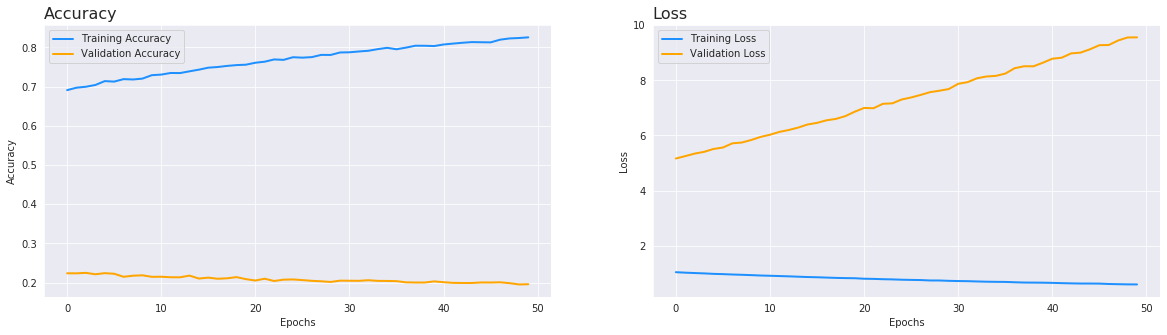

In [0]:
# plot history
plot_history(history)

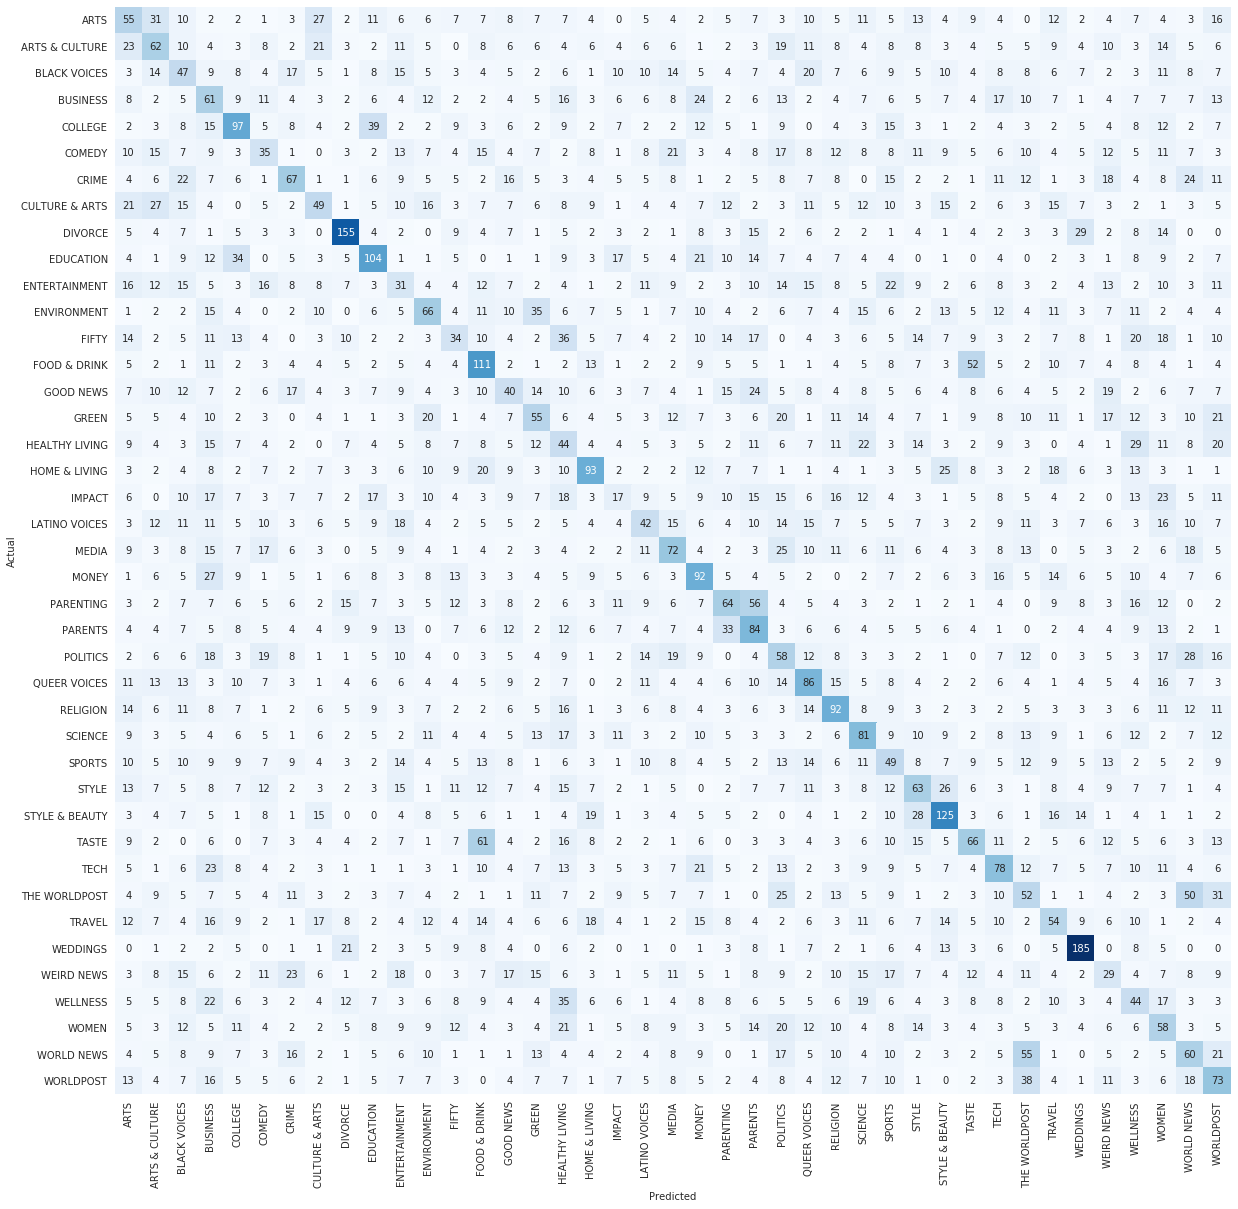

In [0]:
# plot confusion matrix
plot_cm(pred, enc.classes_, 20)

In [0]:
# reviews on which we need to predict
sentence = ["The movie was very touching and heart whelming", 
            "I have never seen a terrible movie like this"]

# convert to a sequence
sequences = tokenizer.texts_to_sequences(sentence)

# pad the sequence
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# preict the label
pred = model.predict(padded)
pred = np.array([np.argmax(i) for i in pred])
for i in range(len(sentence)):

    print(sentence[i], '\t:\t', enc.classes_[pred[i]])


The movie was very touching and heart whelming : GOOD NEWS
I have never seen a terrible movie like this : WEIRD NEWS

In [0]:
# reviews on which we need to predict
sentence = ["Rojer federer is into the wimbledon finals", 
            "NASA to launch two more satellites this year",
           "There's no such thing as too much Star Wars.",
           "nfl team drunkest fans football booze go hand hand especially buffalo new york new study reveals buffalo bills may."]

# convert to a sequence
sequences = tokenizer.texts_to_sequences(sentence)

# pad the sequence
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# preict the label
pred = model.predict(padded)
pred = np.array([np.argmax(i) for i in pred])
for i in range(len(sentence)):

    print(sentence[i], '\t:\t', enc.classes_[pred[i]])

Rojer federer is into the wimbledon finals : WORLDPOST
NASA to launch two more satellites this year : CULTURE & ARTS
There's no such thing as too much Star Wars. : GOOD NEWS
nfl team drunkest fans football booze go hand hand especially buffalo new york new study reveals buffalo bills may. : WEIRD NEWS

In [0]:
#¿Ahora, utilizando técnicas de aprendizaje no supervisado, trata de identificar temas,“protagonistas” u otras entidades de las noticias.?
pip install spacy && python -m spacy download en

Python interpreter will be restarted.
Requirement already satisfied: spacy in /local_disk0/.ephemeral_nfs/envs/pythonEnv-d4aa03e3-3353-42bf-8864-b5eb69fcae82/lib/python3.7/site-packages (2.3.2)
Requirement already satisfied: cymem<2.1.0,>=2.0.2 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-d4aa03e3-3353-42bf-8864-b5eb69fcae82/lib/python3.7/site-packages (from spacy) (2.0.4)
Requirement already satisfied: srsly<1.1.0,>=1.0.2 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-d4aa03e3-3353-42bf-8864-b5eb69fcae82/lib/python3.7/site-packages (from spacy) (1.0.4)
Requirement already satisfied: murmurhash<1.1.0,>=0.28.0 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-d4aa03e3-3353-42bf-8864-b5eb69fcae82/lib/python3.7/site-packages (from spacy) (1.0.4)
Requirement already satisfied: requests<3.0.0,>=2.13.0 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-d4aa03e3-3353-42bf-8864-b5eb69fcae82/lib/python3.7/site-packages (from spacy) (2.22.0)
Requirement already satisfied: blis<0.5.0,>=0.4.0 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-d4aa03e3-3353-42bf-8864-b5eb69fcae82/lib/python3.7/site-packages (from spacy) (0.4.1)
Requirement already satisfied: numpy>=1.15.0 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-d4aa03e3-3353-42bf-8864-b5eb69fcae82/lib/python3.7/site-packages (from spacy) (1.18.1)
Requirement already satisfied: wasabi<1.1.0,>=0.4.0 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-d4aa03e3-3353-42bf-8864-b5eb69fcae82/lib/python3.7/site-packages (from spacy) (0.8.0)
Requirement already satisfied: plac<1.2.0,>=0.9.6 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-d4aa03e3-3353-42bf-8864-b5eb69fcae82/lib/python3.7/site-packages (from spacy) (1.1.3)
Requirement already satisfied: thinc==7.4.1 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-d4aa03e3-3353-42bf-8864-b5eb69fcae82/lib/python3.7/site-packages (from spacy) (7.4.1)
Requirement already satisfied: preshed<3.1.0,>=3.0.2 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-d4aa03e3-3353-42bf-8864-b5eb69fcae82/lib/python3.7/site-packages (from spacy) (3.0.4)
Requirement already satisfied: tqdm<5.0.0,>=4.38.0 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-d4aa03e3-3353-42bf-8864-b5eb69fcae82/lib/python3.7/site-packages (from spacy) (4.42.1)
Requirement already satisfied: catalogue<1.1.0,>=0.0.7 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-d4aa03e3-3353-42bf-8864-b5eb69fcae82/lib/python3.7/site-packages (from spacy) (1.0.0)
Requirement already satisfied: setuptools in /local_disk0/.ephemeral_nfs/envs/pythonEnv-d4aa03e3-3353-42bf-8864-b5eb69fcae82/lib/python3.7/site-packages (from spacy) (45.2.0.post20200210)
Requirement already satisfied: urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-d4aa03e3-3353-42bf-8864-b5eb69fcae82/lib/python3.7/site-packages (from requests<3.0.0,>=2.13.0->spacy) (1.25.8)
Requirement already satisfied: idna<2.9,>=2.5 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-d4aa03e3-3353-42bf-8864-b5eb69fcae82/lib/python3.7/site-packages (from requests<3.0.0,>=2.13.0->spacy) (2.8)
Requirement already satisfied: certifi>=2017.4.17 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-d4aa03e3-3353-42bf-8864-b5eb69fcae82/lib/python3.7/site-packages (from requests<3.0.0,>=2.13.0->spacy) (2020.6.20)
Requirement already satisfied: chardet<3.1.0,>=3.0.2 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-d4aa03e3-3353-42bf-8864-b5eb69fcae82/lib/python3.7/site-packages (from requests<3.0.0,>=2.13.0->spacy) (3.0.4)
Requirement already satisfied: importlib-metadata>=0.20; python_version < "3.8" in /local_disk0/.ephemeral_nfs/envs/pythonEnv-d4aa03e3-3353-42bf-8864-b5eb69fcae82/lib/python3.7/site-packages (from catalogue<1.1.0,>=0.0.7->spacy) (3.1.0)
Requirement already satisfied: zipp>=0.5 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-d4aa03e3-3353-42bf-8864-b5eb69fcae82/lib/python3.7/site-packages (from importlib-metadata>=0.20; python_version < "3.8"->catalogue<1.1.0,>=0.0.7->spacy) (3.4.0)
Collecting en_core_web_sm==2.3.1
 Downloading https://github.com/explosion/spacy-

In [0]:
from sklearn.datasets import load_files
import pandas as pd
import spacy

nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
random_state = 0

def only_nouns(texts):
    output = []
    for doc in nlp.pipe(texts):
        noun_text = " ".join(token.lemma_ for token in doc if token.pos_ == 'NOUN')
        output.append(noun_text)
    return output


df['text'] = only_nouns(df['headline'])

df.head()

,category,headline,authors,link,short_description,date,text
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,tv
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,song
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,castrato
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,dog


In [0]:
# number of topics to extract
n_topics = 60

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vec = TfidfVectorizer(max_features=5000, stop_words="english", max_df=0.95, min_df=2)
features = vec.fit_transform(df.text)

from sklearn.decomposition import NMF
cls = NMF(n_components=n_topics, random_state=random_state)
cls.fit(features)

Out[38]: NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
 n_components=60, random_state=0, shuffle=False, solver='cd', tol=0.0001,
 verbose=0)

In [0]:
# list of unique words found by the vectorizer
feature_names = vec.get_feature_names()

# number of most influencing words to display per topic
n_top_words = 5


for i, topic_vec in enumerate(cls.components_):
    print(i, end=' ')
    # topic_vec.argsort() produces a new array
    # in which word_index with the least score is the
    # first array element and word_index with highest
    # score is the last array element. Then using a
    # fancy indexing [-1: -n_top_words-1:-1], we are
    # slicing the array from its end in such a way that
    # top `n_top_words` word_index with highest scores
    # are returned in desceding order
    for fid in topic_vec.argsort()[-1:-n_top_words-1:-1]:
        print(feature_names[fid], end=' ')
    print()

0 video music snl proposal ad 
1 woman business men violence abortion 
2 day inspiration weekend dad mother 
3 thing divorce mother today sleep 
4 way stress weekend relationship happiness 
5 life sex balance end doctor 
6 people habit lot color type 
7 year prison resolution end today 
8 time word screen jail sign 
9 kid book dad autism toy 
10 child abuse care autism need 
11 man cop sex spider car 
12 wedding couple bride planning guest 
13 week tweet picture list accessory 
14 home weekend dad sale vacation 
15 baby boy birthday doctor product 
16 reason birthday divorce relationship vacation 
17 mom question teen advice gift 
18 parent teen advice sex question 
19 tip travel expert divorce relationship 
20 food junk stamp company future 
21 death toll anniversary penalty row 
22 change climate scientist action candidate 
23 marriage sex equality couple proposal 
24 season trailer style tweet premiere 
25 police officer shooting car violence 
26 girl boy scout old education 
27 history month shooting violence look 
28 love couple message self word 
29 family vacation victim travel business 
30 summer vacation travel end camp 
31 moment style birthday car mother 
32 election voter result future night 
33 daughter word dad mother birthday 
34 money politic fear divorce lot 
35 student teacher loan college debt 
36 art nail artist book street 
37 state city law right voter 
38 recipe dish spring egg weekend 
39 star celebrity style word race 
40 letter birthday teen self doctor 
41 world leader place record order 
42 lesson style business mother health 
43 work stress sex balance right 
44 friend divorce today help question 
45 problem sleep voter teen health 
46 debate voter fact question candidate 
47 story job celebrity movie victim 
48 school teen teacher shooting leader 
49 campaign ad report voter plan 
50 interview job word question case 
51 dress globe body style bride 
52 step divorce relationship stress plan 
53 country leader future singer wine 
54 heart attack body risk mind 
55 medium word divorce message voter 
56 holiday gift stress travel celebrity 
57 tv ad reality job couple 
58 photo face body couple travel 
59 idea weekend voter use celebrity

###¿Existen estilos de escritura asociados a cada categoría?